In [74]:
import pandas as pd
import numpy as np

In [75]:
df = pd.read_csv('datasets/bank.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [76]:
unknown_columns = [name for name in df.columns if (df[name] == 'unknown').any()]
print("İçinde 'unknown' bulunan sütunlar:")
print(unknown_columns)
print(f"\nToplam: {len(unknown_columns)} sütun")


İçinde 'unknown' bulunan sütunlar:
['job', 'education', 'contact', 'poutcome']

Toplam: 4 sütun


In [77]:
unknown_info = (df == 'unknown').sum()
print("Sütunlardaki 'unknown' değerlerinin sayısı:")
print(unknown_info, end="\n\n")

Sütunlardaki 'unknown' değerlerinin sayısı:
age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64



In [78]:
unknown_ratio_per_column = {col: (df[col] == 'unknown').sum() / len(df) for col in df.columns}
print("Sütunlardaki 'unknown' oranları:")
print(unknown_ratio_per_column, end="\n\n")

Sütunlardaki 'unknown' oranları:
{'age': np.float64(0.0), 'job': np.float64(0.0084052200840522), 'marital': np.float64(0.0), 'education': np.float64(0.0413625304136253), 'default': np.float64(0.0), 'balance': np.float64(0.0), 'housing': np.float64(0.0), 'loan': np.float64(0.0), 'contact': np.float64(0.29285556292855563), 'day': np.float64(0.0), 'month': np.float64(0.0), 'duration': np.float64(0.0), 'campaign': np.float64(0.0), 'pdays': np.float64(0.0), 'previous': np.float64(0.0), 'poutcome': np.float64(0.8195089581950896), 'y': np.float64(0.0)}



In [79]:
impute_job_value = df['job'].mode()
impute_job_value[0]

'management'

In [80]:
df['job'] = df['job'].replace('unknown', impute_job_value[0])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [81]:
impute_education_value = df['education'].mode()
impute_education_value[0]

'secondary'

In [82]:
df['education'] = df['education'].replace('unknown', impute_education_value[0])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


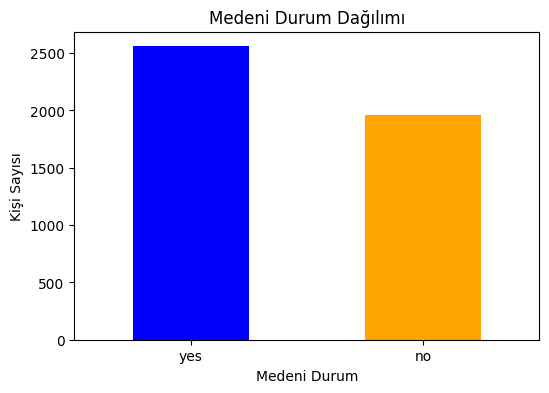

In [83]:
import matplotlib.pyplot as plt

married_counts = df['housing'].value_counts()

plt.figure(figsize=(6, 4))
married_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Medeni Durum')
plt.ylabel('Kişi Sayısı')
plt.title('Medeni Durum Dağılımı')
plt.xticks(rotation=0)

plt.show()

In [84]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [85]:
le.fit(df['default'])
df['default'] = le.transform(df['default'])

In [86]:
le.fit(df['housing'])
df['housing'] = le.transform(df['housing'])

In [87]:
le.fit(df['loan'])
df['loan'] = le.transform(df['loan'])

In [88]:
le.fit(df['y'])
df['y'] = le.transform(df['y'])

In [89]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0
5,35,management,single,tertiary,0,747,0,0,cellular,23,feb,141,2,176,3,failure,0
6,36,self-employed,married,tertiary,0,307,1,0,cellular,14,may,341,1,330,2,other,0
7,39,technician,married,secondary,0,147,1,0,cellular,6,may,151,2,-1,0,unknown,0
8,41,entrepreneur,married,tertiary,0,221,1,0,unknown,14,may,57,2,-1,0,unknown,0
9,43,services,married,primary,0,-88,1,1,cellular,17,apr,313,1,147,2,failure,0


In [90]:
ohe_df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], dtype=int)
ohe_df.head(10)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
1,33,0,4789,1,1,11,220,1,339,4,...,0,0,1,0,0,0,1,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,1,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,0,1,0,5,226,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
5,35,0,747,0,0,23,141,2,176,3,...,0,0,0,0,0,0,1,0,0,0
6,36,0,307,1,0,14,341,1,330,2,...,0,0,1,0,0,0,0,1,0,0
7,39,0,147,1,0,6,151,2,-1,0,...,0,0,1,0,0,0,0,0,0,1
8,41,0,221,1,0,14,57,2,-1,0,...,0,0,1,0,0,0,0,0,0,1
9,43,0,-88,1,1,17,313,1,147,2,...,0,0,0,0,0,0,1,0,0,0


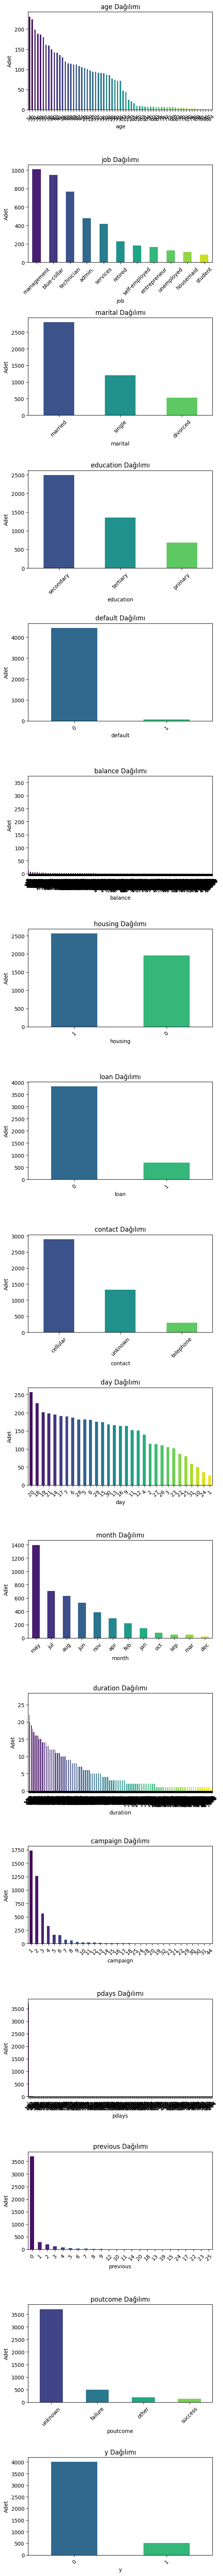

In [91]:
import seaborn as sns

plt.figure(figsize=(6, len(df.columns) * 4))

for i, column in enumerate(df.columns, 1):
    plt.subplot(len(df.columns), 1, i)
    value_counts = df[column].value_counts()
    colors = sns.color_palette("viridis", len(value_counts))
    value_counts.plot(kind='bar', color=colors)
    plt.xlabel(column)
    plt.ylabel('Adet')
    plt.title(f'{column} Dağılımı')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()